In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import minkowski_distance, Voronoi, voronoi_plot_2d
from IPython.display import Image

## Exercise 2.1

In [2]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

Data processing

In [3]:
with open('cars.data.txt','r') as csvfile:
    cars_data = pd.read_csv(csvfile)

cars_X = cars_data.drop(labels='Origin Country', axis=1).values
cars_y = cars_data['Origin Country'].values

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, 
                                 test_size=0.33, random_state=88)

Accuracy with weight for different features

In [4]:
knn = KNN(n_neighbors=3)

weights = np.arange(0.1, 10, 0.2)

accuracy_weight = []
for weight in weights:
    accuracies = []
    for w in [[weight, 1, 1], [1, weight, 1], [1, 1, weight]]:
        accuracy_ = knn.set_params(metric='wminkowski', metric_params={'w': w}).fit(cars_X_train, \
                    cars_y_train).score(cars_X_test, cars_y_test)
        accuracies.append(accuracy_)
    accuracy_weight.append(accuracies) 

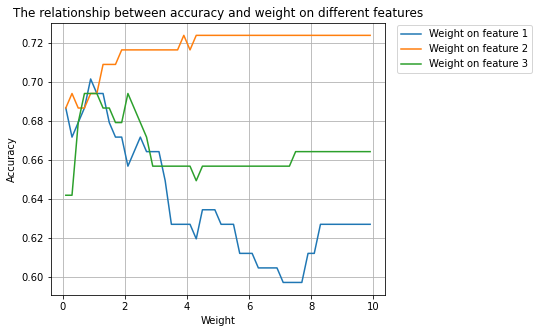

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
for accuracies, feature in zip(np.array(accuracy_weight).T, [1, 2, 3]):
    ax.plot(weights, accuracies, label=f'Weight on feature {feature}')
ax.set(xlabel='Weight', ylabel='Accuracy', title='The relationship between accuracy and weight on different features')
ax.grid()
ax.legend(bbox_to_anchor=(1.02, 1.01));

The figure above draw the relationship between accuracy and weight on different features (changing the weight of one feature while fixing the other two). As can be seen feature 2 is the most important one since more weight on it will increase the prediction accuracy. But once the wieght is more than certain value, it's no longer helpful in increasing accuracy. 

Accuray with different $P$ and $K$ 

In [6]:
knn = KNN(n_neighbors=3)

num_neighbors = np.arange(1, 100, 2) 
num_p = np.arange(1, 10, 1)

accuracy_neigh = []
accuracy_p = []

for neigh in num_neighbors:
    accuracy = knn.set_params(n_neighbors=neigh).fit(cars_X_train, 
            cars_y_train).score(cars_X_test, cars_y_test)
    accuracy_neigh.append(accuracy)

for p in num_p:
    accuracy = knn.set_params(p=p, n_neighbors=3).fit(cars_X_train, 
            cars_y_train).score(cars_X_test, cars_y_test)
    accuracy_p.append(accuracy)

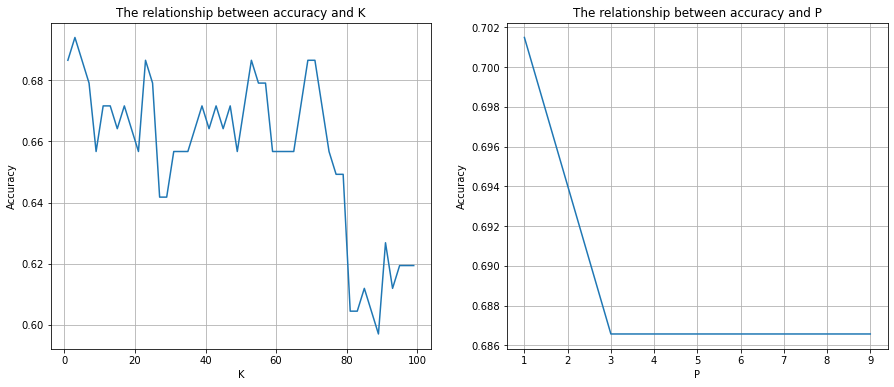

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
values = [(num_neighbors, accuracy_neigh), (num_p, accuracy_p)]
titles = ['K', 'P']

for ax, value, title in zip(axes, values, titles):
    param, accuracy = value
    ax.plot(param, accuracy)
    ax.set(xlabel=title, ylabel='Accuracy', title=f'The relationship between accuracy and {title}')
    ax.grid()

The two figures show the relationships between accuracies and other two parameters, $K$ and $P$. As can be seen, increasing the number of does not always help prediction. In this example, the best $K$ is 3 as shown in the left figure. In addition, the best $P$ is 1. A high $P$ is not helpful.

## Exercise 2.2

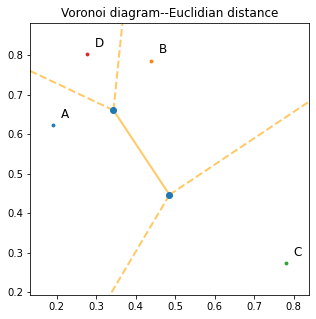

In [8]:
np.random.seed(1234)
points = np.random.rand(4, 2)
labels = ['A', 'B', 'C', 'D']
vor = Voronoi(points)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.axis('equal')
ax.set(xlim=(0, 1), ylim=(0, 1), title='Voronoi diagram--Euclidian distance')
vor_plot = voronoi_plot_2d(vor, ax=ax, show_points=False, line_colors='orange', \
                line_width=2, line_alpha=0.6, point_size=10)

for point, label in zip(points, labels):
    x_, y_ = point
    ax.scatter(x_, y_, s=8)
    ax.text(x_+0.02, y_+0.02, label, fontsize=12)

The figure above shows four-points voronoi diagram using Euclidian distance. Below I sketch the same graph but using Manhattan distance. It is not a trivial task to find the real bounday in python. But two ideas can be used to plot it in coding. One is brute-force. We just simply space many grids in the axis equally and find the boundary among these points. Another one is taking advantage of the relationship as indicated by Manhattan distance. For any two points $(x_1, y_1)$ and $(x_2, y_2)$. The boundary condition is that
$$ |x - x_1|+|y - y_1| = |x - x_2|+|y - y_2|.$$
Then consider $(x, y)$ in different cases. Actually it is easy to find that all the boundaries in voronoi diagram (Manhattan distance) are either line segement parallel with axis or $45^o$-degree line segement.

<img style="transform: rotate(270deg); width:300px" src="Taxicab.jpg" title="Manhattan Voronoi" />

## Exercise 2.3

In [9]:
x = (1,1,-2,-2,1,2,-4,4,2)
y = (0,1,4,-2,3,5,-5,5,-1)
label = ('a','b','a','b','a','a','a','b','b')
colors = np.where(np.array(label)=='a', 'red', 'blue')

zs = [(0, 0), (-2, 0), (5, 5)]
z_labels = ['A', 'B', 'C']

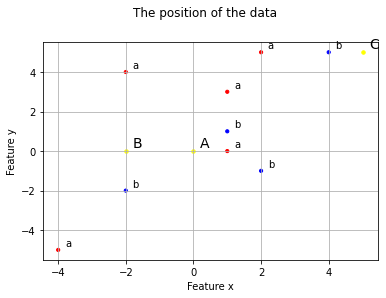

In [10]:
fig, ax = plt.subplots(1, 1)
ax.scatter(x, y, s=10, c=colors)
ax.grid()
ax.set(xlabel='Feature x', ylabel='Feature y')
fig.suptitle('The position of the data', y= 1.005)
for x_, y_, label_ in zip(x, y, label):
    ax.text(x_+0.2, y_+0.2, label_, fontsize=10)

for z, z_label in zip(zs, z_labels):
    ax.scatter(z[0], z[1], s=12, c='yellow')
    ax.text(z[0]+0.2, z[1]+0.2, z_label, fontsize=14)

In [11]:
Ks = np.arange(1, 10, 2)
distances = ['euclidean', 'manhattan', 'chebyshev']

predictions = []
for distance in distances:
    for K in Ks:
        param = [distance, K]
        prediction = KNN(n_neighbors=K, metric=distance).fit(np.column_stack((x, y)), label).predict(zs).tolist()
        predictions.append(param + prediction)

In [12]:
pred_res = pd.DataFrame(data=predictions, columns=['Metric', 'K', \
                    'A(0, 0)', 'B(-2, 0)', 'C(5, 5)'])
pred_res.set_index(['Metric', 'K'])

A(0, 0) B(-2, 0) C(5, 5)
Metric    K                         
euclidean 1       a        b       b
          3       b        b       a
          5       b        b       a
          7       a        a       a
          9       a        a       a
manhattan 1       a        b       b
          3       b        b       a
          5       b        b       a
          7       a        a       a
          9       a        a       a
chebyshev 1       a        b       b
          3       b        b       b
          5       b        b       a
          7       b        a       b
          9       a        a       a

I plot the position of the data points. The table shows predictions for the three points under different conditions.

### Exercise 2.4

In general, the chance that a data point will be predicted as $a_1$ increases as $K$ increases. That is, the decision boundary of $a_1$'s side will include more and more $a_2$. In other words, the area of predicting to be $a_1$ for a given point will be bigger.  In some extreme case, if we take $ K \geq 2N_2 + 1 $, all the predictions will be type $a_1$.